# Ejercicios de Análisis de Datos de Ventas

En este notebook se proponen 10 ejercicios diferentes utilizando un dataset de ventas. Cada ejercicio requiere aplicar operaciones de agrupación (*groupby*), conteo de valores (*value_counts*), cálculos de medias, y generar visualizaciones para responder preguntas específicas.

El dataset de ejemplo tiene la siguiente estructura:

| InvoiceNo | StockCode | Description                                    | Quantity | InvoiceDate        | UnitPrice | CustomerID | Country        |
|-----------|-----------|------------------------------------------------|----------|--------------------|-----------|------------|----------------|
| 536365    | 85123A    | WHITE HANGING HEART T-LIGHT HOLDER             | 6        | 12/1/2010 8:26     | 2.55      | 17850.0    | United Kingdom |
| 536365    | 71053     | WHITE METAL LANTERN                            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |
| 536365    | 84406B    | CREAM CUPID HEARTS COAT HANGER                 | 8        | 12/1/2010 8:26     | 2.75      | 17850.0    | United Kingdom |
| 536365    | 84029G    | KNITTED UNION FLAG HOT WATER BOTTLE            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |

Puedes ampliar el dataset según sea necesario para los ejercicios.

In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
!unzip customer_segmentation.csv.zip

--2025-03-25 21:40:54--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip [following]
--2025-03-25 21:40:54--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7548720 (7.2M) [application/zip]
Saving to: ‘customer_segmentation.csv.zip’

customer_s

## Preparación del Dataset

Primero, importamos las librerías necesarias, creamos el DataFrame de ejemplo y realizamos las conversiones correspondientes.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Creación del DataFrame de ejemplo
data = pd.read_csv('customer_segmentation.csv',encoding="latin-1")

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Convertir InvoiceDate a tipo datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Mostrar el DataFrame
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Ejercicio 1: Exploración del Dataset

Realiza una exploración básica del dataset: muestra las primeras filas, la información general (con `.info()`) y verifica si hay datos nulos.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
data.shape

(541909, 8)

In [6]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [7]:
data_c = data.dropna(subset=['CustomerID'])

In [8]:
data_c.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [9]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


## Ejercicio 2: Agrupación por País

Agrupa los datos por la columna `Country` para:
- Calcular el total de `Quantity` vendido por país.
- Calcular la media de `UnitPrice` por país.

Visualiza el total de `Quantity` por país utilizando un gráfico de barras. Dame los 5 primeros

In [10]:
Data_q=data_c.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(5)

In [11]:
print(Data_q)

Country
United Kingdom    4008533
Netherlands        200128
EIRE               136329
Germany            117448
France             109848
Name: Quantity, dtype: int64


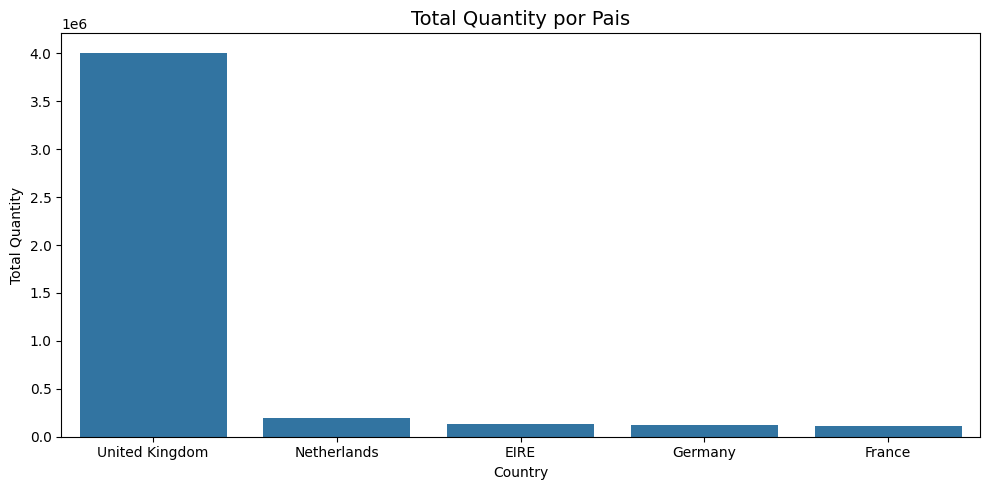

In [12]:
plt.figure(figsize=(10, 5))
sns.barplot(x=Data_q.index, y=Data_q.values)
plt.title('Total Quantity por Pais', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Total Quantity')
plt.tight_layout()
plt.show()

In [13]:
data_c.groupby('Country')['UnitPrice'].mean()

,UnitPrice
Country,
Australia,3.220612
Austria,4.243192
Bahrain,4.644118
Belgium,3.644335
Brazil,4.456250
Canada,6.030331
Channel Islands,4.932124
Cyprus,6.302363
Czech Republic,2.938333


## Ejercicio 3: Frecuencia de StockCode

Agrupa el DataFrame por `StockCode` y cuenta la frecuencia de cada producto. Utiliza `value_counts` para verificar el resultado.

Visualiza los StockCode más frecuentes con un gráfico de barras horizontal. Dame los 10 primeros

In [14]:
top_10_stockcodes=data_c.groupby('StockCode')['StockCode'].count().sort_values(ascending=False).head(10)

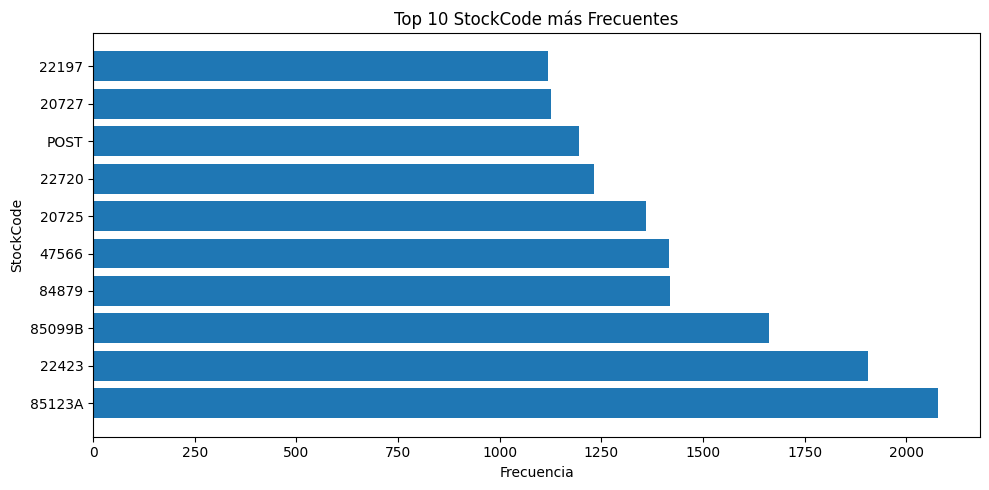

In [15]:
plt.figure(figsize=(10, 5))
plt.barh(top_10_stockcodes.index, top_10_stockcodes.values)
plt.xlabel('Frecuencia')
plt.ylabel('StockCode')
plt.title('Top 10 StockCode más Frecuentes')
plt.tight_layout()
plt.show()

## Ejercicio 4: Ventas Totales por Factura

1. Crea una nueva columna llamada `TotalPrice` que sea el producto de `Quantity` y `UnitPrice`.
2. Agrupa los datos por `InvoiceNo` y calcula la suma de `TotalPrice` para cada factura.
3. Calcula la factura promedio (media) del total de ventas por factura.

Visualiza la distribución de los totales de factura con un histograma.

In [16]:
data_c['TotalPrice'] = data_c['Quantity'] * data_c['UnitPrice']

<ipython-input-16-c8758a398f71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c['TotalPrice'] = data_c['Quantity'] * data_c['UnitPrice']


In [17]:
data_c.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [18]:
total_por_factura=data_c.groupby('InvoiceNo')['TotalPrice'].sum()
print(total_por_factura)

InvoiceNo
536365        139.12
536366         22.20
536367        278.73
536368         70.05
536369         17.85
             ...    
C581484   -168469.60
C581490       -32.53
C581499      -224.69
C581568       -54.75
C581569        -7.50
Name: TotalPrice, Length: 22190, dtype: float64


In [19]:
total_por_factura.mean()

np.float64(374.0453273546642)

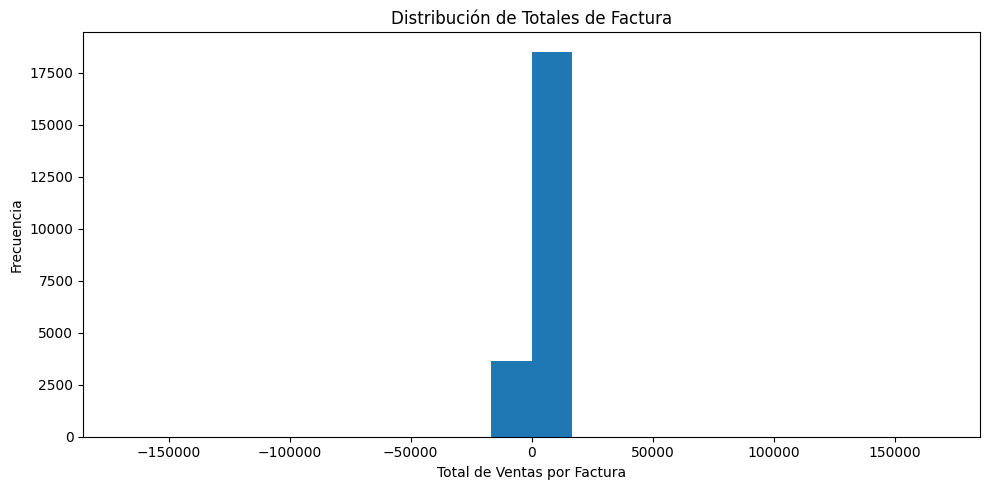

In [20]:
plt.figure(figsize=(10, 5))
plt.hist(total_por_factura, bins=20)
plt.xlabel('Total de Ventas por Factura')
plt.ylabel('Frecuencia')
plt.title('Distribución de Totales de Factura')
plt.tight_layout()
plt.show()

## Ejercicio 5: Evolución Temporal de Ventas

Utiliza la columna `InvoiceDate` para visualizar cómo evoluciona el valor de `TotalPrice` a lo largo del tiempo.

Realiza un gráfico de líneas donde el eje x sea la fecha y el eje y sea `TotalPrice`.

In [21]:
ventas_por_fecha = data_c.groupby('InvoiceDate')['TotalPrice'].sum()

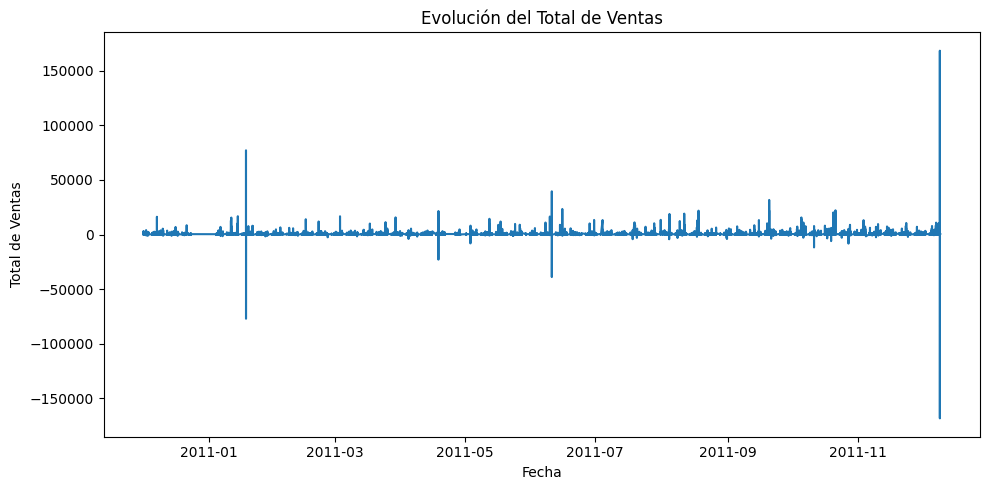

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(ventas_por_fecha.index, ventas_por_fecha.values)
plt.xlabel('Fecha')
plt.ylabel('Total de Ventas')
plt.title('Evolución del Total de Ventas')
plt.tight_layout()
plt.show()


## Ejercicio 6: Boxplot de UnitPrice por País

Crea un boxplot para visualizar la distribución de `UnitPrice` en función de `Country`.

Este gráfico ayudará a identificar la dispersión y posibles valores atípicos en los precios.

In [23]:
data_c.groupby('Country')['UnitPrice'].count()

,UnitPrice
Country,
Australia,1259
Austria,401
Bahrain,17
Belgium,2069
Brazil,32
Canada,151
Channel Islands,758
Cyprus,622
Czech Republic,30


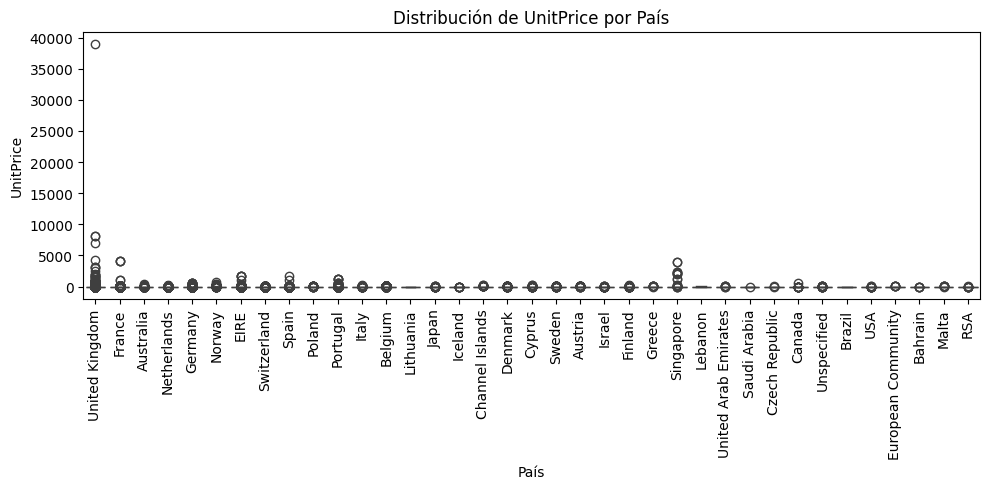

In [24]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Country', y='UnitPrice', data=data_c)
plt.xticks(rotation=90)
plt.title('Distribución de UnitPrice por País')
plt.xlabel('País')
plt.ylabel('UnitPrice')
plt.tight_layout()
plt.show()

## Ejercicio 7: Scatter Plot entre Quantity y UnitPrice

Realiza un scatter plot para analizar la relación entre `Quantity` y `UnitPrice`.

Observa si existe alguna tendencia o correlación entre la cantidad y el precio unitario.

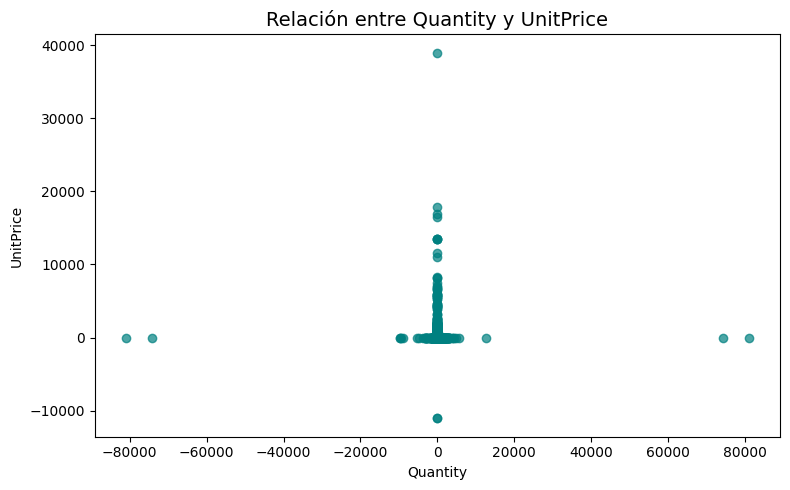

In [25]:
plt.figure(figsize=(8, 5))
plt.scatter(data['Quantity'], data['UnitPrice'], color='teal', alpha=0.7)
plt.title('Relación entre Quantity y UnitPrice', fontsize=14)
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.tight_layout()
plt.show()

## Ejercicio 8: Distribución de Clientes por País

Utilizando la columna `Country`, crea un gráfico de pastel (pie chart) que muestre la proporción de registros por país. Elimine los que tengan muy poco porcentaje)

Este gráfico es útil para visualizar la distribución geográfica de las ventas.

In [35]:
data_c.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(5)

,TotalPrice
Country,
United Kingdom,6767873.394
Netherlands,284661.540
EIRE,250285.220
Germany,221698.210
France,196712.840


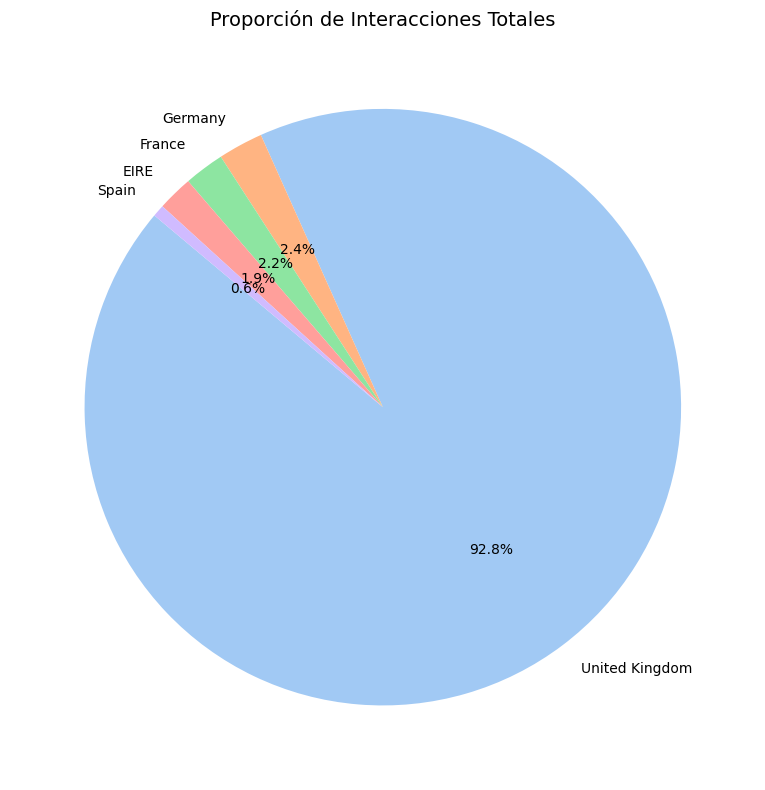

In [37]:
totales = data_c.groupby('Country')['TotalPrice'].count().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 8))
plt.pie(totales, labels=totales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proporción de Interacciones Totales', fontsize=14)
plt.tight_layout()
plt.show()

## Ejercicio 9: Evolución del Precio Unitario Promedio

Agrupa los datos por la fecha (utilizando la columna `InvoiceDate`) para calcular el precio unitario promedio diario y visualízalo con un gráfico de líneas. (hagalo mensual )


Esta visualización permite observar tendencias en el precio a lo largo del tiempo.

In [ ]:
# prompt: Agrupa los datos por la fecha (utilizando la columna InvoiceDate) para calcular el precio unitario promedio diario y visualízalo con un gráfico de líneas. (hagalo mensual )
# Esta visualización permite observar tendencias en el precio a lo largo del tiempo.

# Agrupar por mes y calcular el precio unitario promedio mensual
data_c['MonthYear'] = data_c['InvoiceDate'].dt.to_period('M')
precio_promedio_mensual = data_c.groupby('MonthYear')['UnitPrice'].mean()

# Visualizar con un gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(precio_promedio_mensual.index.to_timestamp(), precio_promedio_mensual.values)
plt.xlabel('Mes')
plt.ylabel('Precio Unitario Promedio')
plt.title('Evolución del Precio Unitario Promedio Mensual')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [38]:
data_c['MonthYear'] = data_c['InvoiceDate'].dt.to_period('M')
precio_promedio_mensual = data_c.groupby('MonthYear')['UnitPrice'].mean()

<ipython-input-38-b8d881c94f0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c['MonthYear'] = data_c['InvoiceDate'].dt.to_period('M')


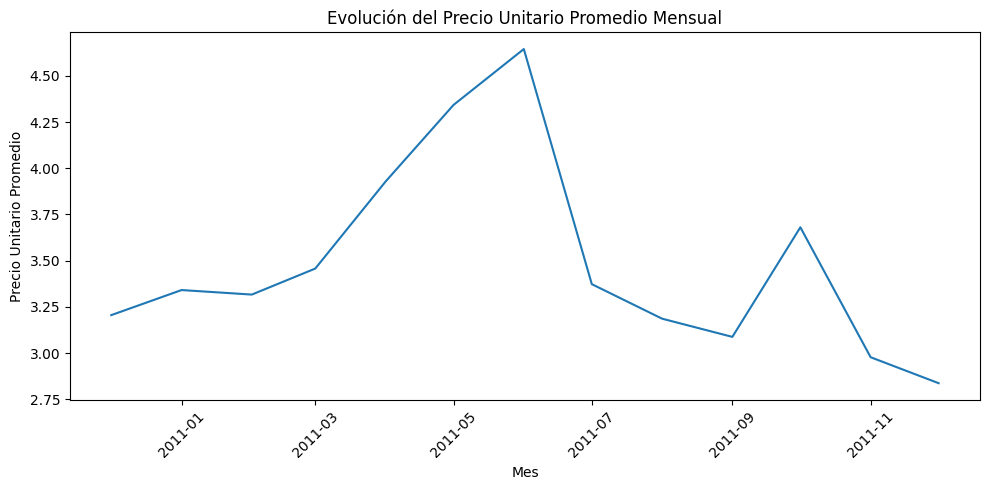

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(precio_promedio_mensual.index.to_timestamp(), precio_promedio_mensual.values)
plt.xlabel('Mes')
plt.ylabel('Precio Unitario Promedio')
plt.title('Evolución del Precio Unitario Promedio Mensual')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Ejercicio 10: Frecuencia de Productos por Descripción

Agrupa el dataset por la columna `Description` y cuenta la frecuencia de cada producto.

Visualiza los 5 productos más frecuentes con un gráfico de barras vertical.

In [ ]:
# prompt: Agrupa el dataset por la columna Description y cuenta la frecuencia de cada producto.
# Visualiza los 5 productos más frecuentes con un gráfico de barras vertical.

# Agrupar por Description y contar la frecuencia de cada producto
product_frequency = data_c.groupby('Description')['Description'].count()

# Obtener los 5 productos más frecuentes
top_5_products = product_frequency.sort_values(ascending=False).head(5)

# Visualizar con un gráfico de barras vertical
plt.figure(figsize=(10, 5))
plt.bar(top_5_products.index, top_5_products.values)
plt.xlabel('Producto')
plt.ylabel('Frecuencia')
plt.title('Top 5 Productos más Frecuentes')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()


In [46]:
Frecuencia_producto=data_c.groupby('Description')['StockCode'].count().sort_values(ascending=False).head(5)

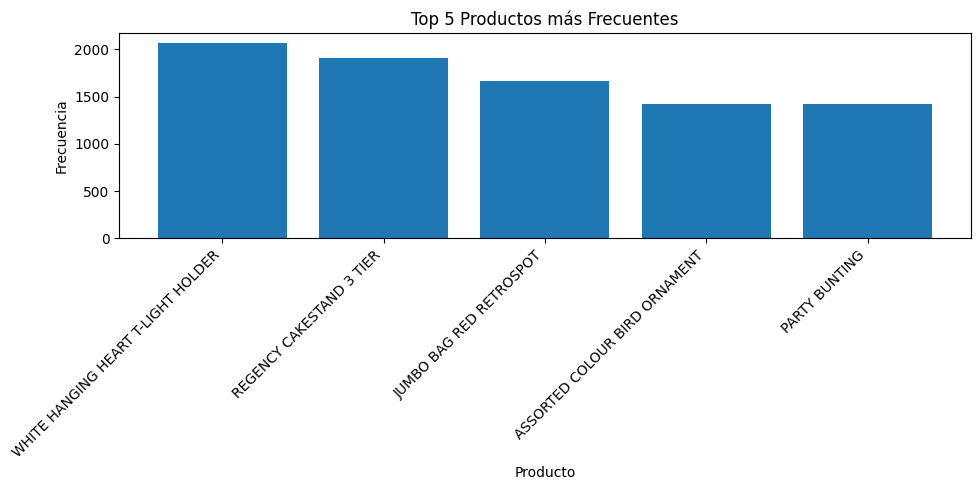

In [47]:
plt.figure(figsize=(10, 5))
plt.bar(Frecuencia_producto.index, Frecuencia_producto.values)
plt.xlabel('Producto')
plt.ylabel('Frecuencia')
plt.title('Top 5 Productos más Frecuentes')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

## Conclusiones Generales

En este notebook se han propuesto 10 ejercicios que cubren desde la exploración básica del dataset hasta operaciones de agrupación y la generación de diferentes tipos de gráficos para responder a preguntas de análisis de ventas.

Recuerda comentar tu código y documentar tus hallazgos en celdas de markdown para que el proceso quede bien explicado.